# Matplotlib Tutorial

Visualization plays an essential role in both analyzing data and sharing results. One widely used python library for visualization is Matplotlib. If you have time, the full documentation for Matplotlib is available on the website https://matplotlib.org/contents.html, but this notebook should serve as a tutorial for the basic features relevant to Medlytics.

## Simple First Graph
As with any python library, the first step is to import the required modules. We will start with the submodule `pyplot`, which provides an interface for basic plotting. We will also import numpy, which you may recognize. This is a scientific computing module that is used a lot in this course.

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

For our first figure, we will plot a few arbitrary points and then apply some labels. Note that the arguments for `.plot()` are two lists of equal size, representing X and Y values. The notebook will automatically render the figure for us, but in stand-alone python code, the call to `plt.show()` becomes necessary.

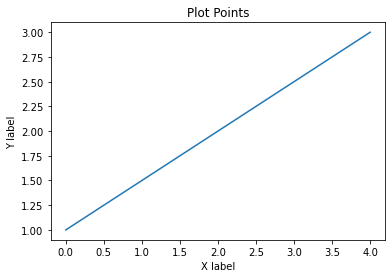

In [5]:
# Plot some (X,Y) data points, defined manually
plt.plot([0,1,2,3,4], [1, 1.5, 2, 2.5, 3])
# Add labels to the current figure
plt.xlabel('X label')
plt.ylabel('Y label')
plt.title('Plot Points')
# Display the figure - not necessary in a jupyter notebook
plt.show()

## Figures and Subplots

You may have noticed the lack of reference to a figure object. Figures in Matplotlib are tracked behind the scenes, and only the "current" figure can be modified. Since we didn't specify a figure, the default figure number (1) was used. We can create a new figure at a specific number with:

In [6]:
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Notice that this time, nothing was rendered. This is because the new figure 1 doesn't have any axes. Calling something like "plot" will generate axes automatically. Another option is to generate axes explicitly, which will give us greater control. For example, the `plt.subplot()` function allows us to have multiple sets of axes on the same figure. Note that each call to subplot will only create one set of axes.

For our example subplots, we will be using some arbitrary numpy array data. Note that for the first subplot axes we are passing multiple sets of (X,Y) data, and that each data argument pair is followed by a formatting argument.

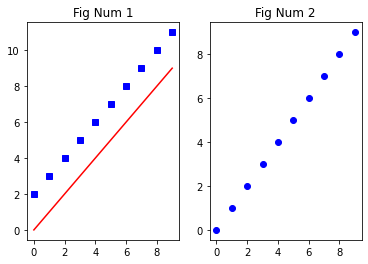

In [7]:
plt.subplot(1,2,1) # 1 row, 2 columns, figure number 1
# Pass multiple numpy arrays as arguments to plt.plot
x = np.arange(0, 10)
y = np.arange(0, 10)
y2 = np.arange(2, 12)
plt.plot(x, y, 'r-', x, y2, 'bs') # formatting: r:red -:line, b:blue s:square
plt.title("Fig Num 1")

plt.subplot(1,2,2)  # 1 row, 2 columns, figure number 2
plt.plot(x, y, 'bo')  # formatting: b:blue o:circle
plt.title("Fig Num 2")

plt.show()

In our final example, we will use a different function to generate multiple axes: `plt.subplots()`, which generates all axes at the same time. In order to track these axes, we will save the output of the function to some variables. We could have been doing this in previous examples, but so far we haven't needed to modify anything other than the current axes. Also note that the first output returned from subplots is actually the figure itself. We can use this saved figure to call `.show()`, which will ensure only this figure is rendered.


<ipython-input-8-e0fb1266c060>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


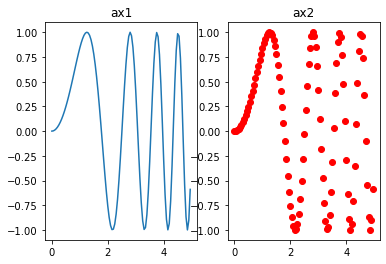

In [8]:
# Generate some numpy data to plot
x = np.arange(0,5, .05)
y = np.sin(x ** 2)
# Create a new set of axes, and a new figure in the process
fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns
ax1.plot(x, y)
ax1.set_title('ax1')
ax2.plot(x, y, 'ro')
ax2.set_title('ax2')

fig.show()

The Matplotlib documentation mentioned above contains a lot more tutorial content, such as for pyplot:

https://matplotlib.org/users/pyplot_tutorial.html

# Seaborn

Seaborn is just another data visualization library that's based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Here are a few examples of how you can use it:

In [9]:
import seaborn as sns

path = 'extendedDiabetes.csv'
data = pd.read_csv(path)
data.head()

,SubjectID,Year,Sex,Age,Ethnicity,ParentEducation,MaritalStatus,HouseIncome,Protein,Carb,...,Chol,VitA,VitC,Weight,Height,BMI,BloodPres,Diabetes,HealthIns,HoursTV
0,1,6,1,49,3,5,1,11,97.13,253.98,...,180.57,10292.63,112.19,92.5,178.3,29.10,694,2,1,2
1,2,2,1,37,3,4,5,11,130.02,309.57,...,1242.06,4181.03,70.96,99.2,180.0,30.62,1169,2,1,1
2,3,1,1,70,1,1,1,3,67.01,268.23,...,37.41,36792.50,78.51,63.6,157.7,25.57,725,1,1,5
3,4,6,2,38,3,5,3,8,82.66,264.69,...,596.30,3075.79,36.11,81.6,174.9,26.68,697,2,1,3
4,5,2,2,85,4,1,2,1,39.62,112.24,...,124.95,16894.37,69.19,41.5,144.2,19.96,687,2,1,1


More info on `seaborn.distplot()` here: https://seaborn.pydata.org/generated/seaborn.distplot.html

/Users/ash/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

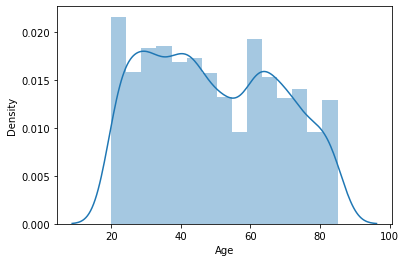

In [10]:
# Distribution of age using seaborn
sns.distplot(data['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Density')

More info on `seaborn.boxplot()` here: https://seaborn.pydata.org/generated/seaborn.boxplot.html

/Users/ash/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Age')

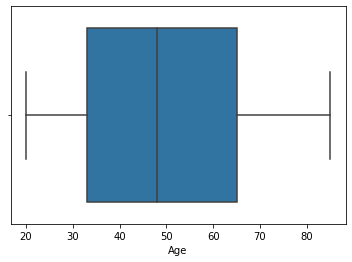

In [11]:
# Boxplot of age 
sns.boxplot('Age', data = data)
plt.xlabel('Age')

More info on `seaborn.countplot()` here: https://seaborn.pydata.org/generated/seaborn.countplot.html

Text(0.5, 0, 'Sex')

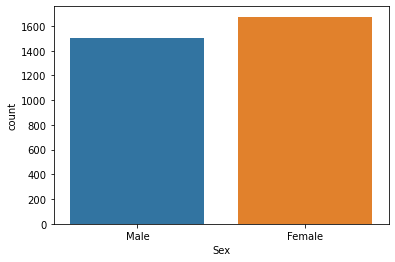

In [12]:
# Frequency of sex using seaborn
sns.countplot(x = 'Sex', data = data) 
plt.xticks(np.arange(2), labels = ('Male', 'Female'), rotation = 0)
plt.xlabel('Sex')

More info on `seaborn.heatmap()` here: https://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot:>

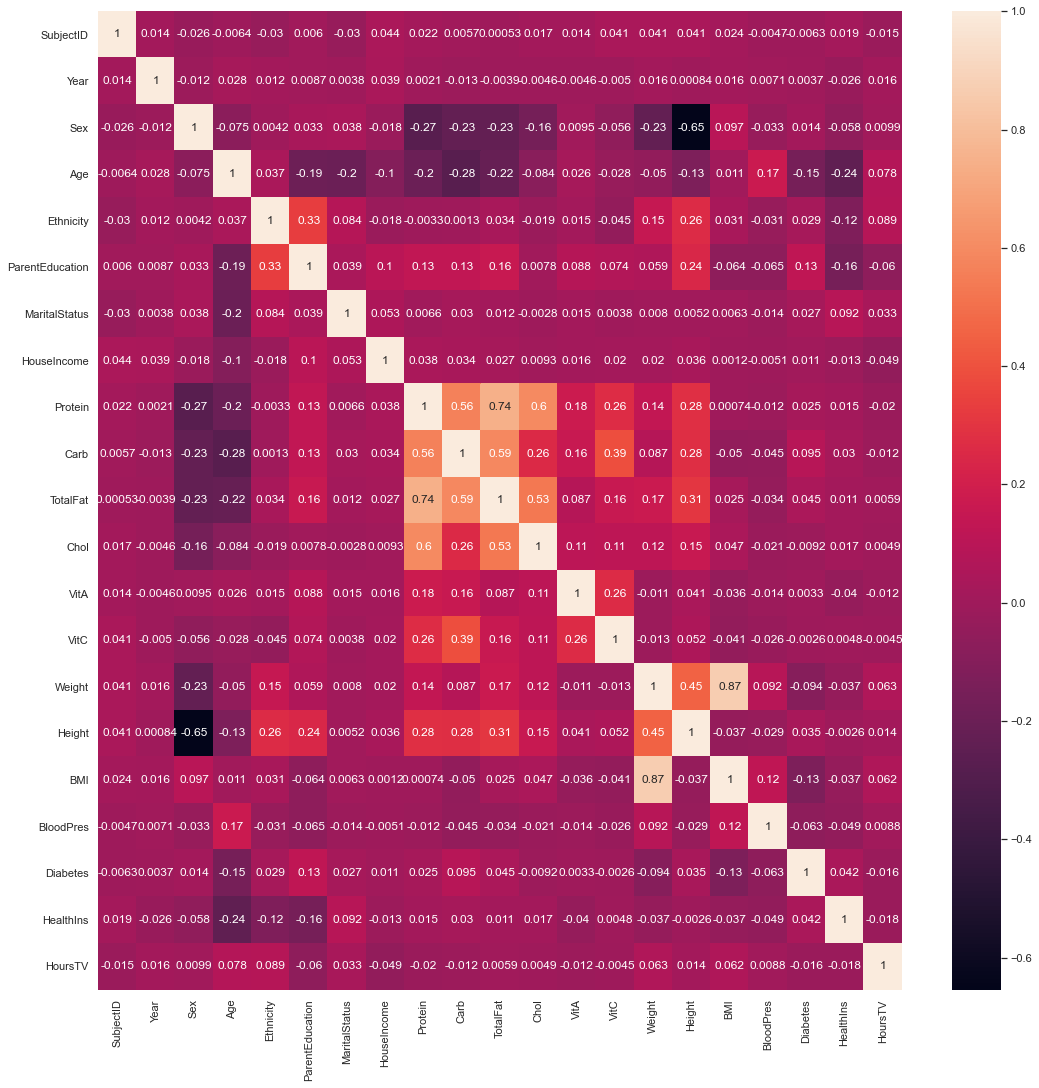

In [13]:
sns.set(rc={'figure.figsize':(18, 18)}) # Bigger figures
sns.heatmap(data.corr(), annot = True) # Creating a heatmap of all variables in the data set

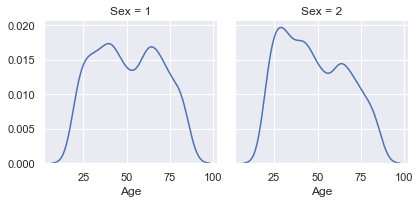

In [14]:
g = sns.FacetGrid(data, col = 'Sex') # Facet distribution plots by sex
g = g.map(sns.kdeplot, 'Age')

More info on `seaborn.pairplot()` here: https://seaborn.pydata.org/generated/seaborn.pairplot.html

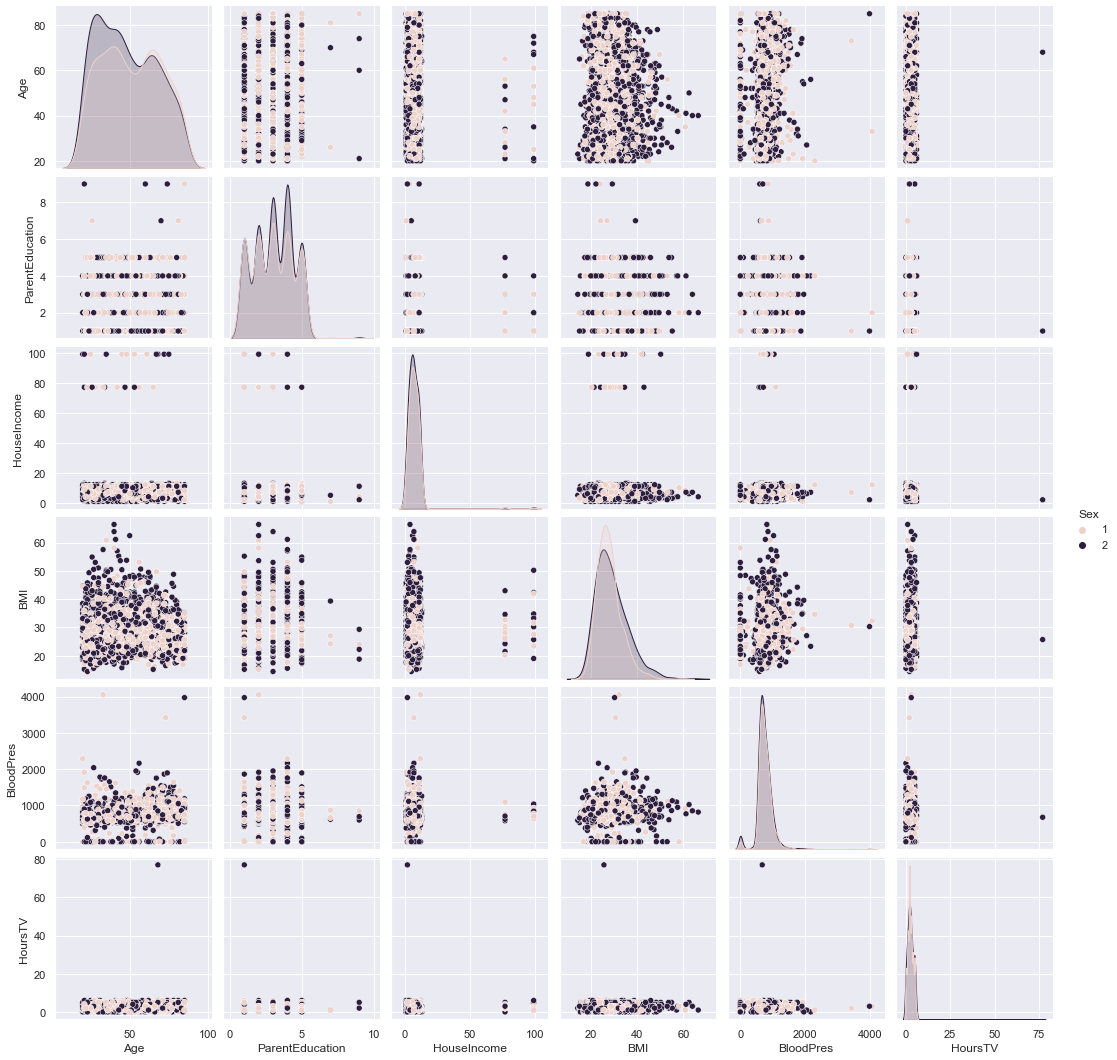

In [15]:
# Pairwise plots only for selected variables
sns.pairplot(data, vars =['Age', 'ParentEducation', 'HouseIncome', 'BMI', 'BloodPres', 'HoursTV'], hue="Sex")

You can access the saved image on the left-hand side of your screen, where the Colab files are located

In [16]:
# Saving figures
plt.savefig("figs.png")

<Figure size 1296x1296 with 0 Axes>

# Exploratory Data Analysis

Seaborn/Matplotlib is very effective for conducting **Exploratory Data Analysis (EDA)**. 

EDA and Data preparation are critical for having more effective ML models.
EDA analysis can fall under three categories:
- Univariate
- Bivariate
- Multivariate

These analyses can provide insight when manually choosing the most optimal features during Feature Selection.

## Univariate Analysis

**Univariate analysis** means the analysis of data that has one variable. These are summary statistics that tell about the mean, variance, quartiles, and standard deviation, among others. Learning about the distribution of data through univariate analysis is a necessary step to measure the effectiveness of a ML algorithm's prediction.

In [17]:
data.describe() #provides (typically continuous) summary statistics for univariate analysis 

,SubjectID,Year,Sex,Age,Ethnicity,ParentEducation,MaritalStatus,HouseIncome,Protein,Carb,...,Chol,VitA,VitC,Weight,Height,BMI,BloodPres,Diabetes,HealthIns,HoursTV
count,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,...,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000
mean,1590.000000,3.502988,1.526895,49.583517,2.659956,3.023907,2.285624,7.419629,77.659918,259.830349,...,287.541063,6757.386169,104.946902,79.495816,166.759264,28.510434,744.195659,1.921044,1.214847,2.510538
std,917.842579,1.710178,0.499355,18.738828,1.139625,1.365098,2.851068,8.012738,41.169248,133.498131,...,251.999559,10580.392797,112.246592,19.794348,10.051864,6.314326,240.000005,0.364911,0.489107,2.034968
min,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,0.040000,1.180000,...,0.000000,0.000000,0.000000,34.500000,130.400000,14.420000,0.000000,1.000000,1.000000,0.000000
25%,795.500000,2.000000,1.000000,33.000000,1.000000,2.000000,1.000000,4.000000,50.080000,166.705000,...,121.895000,1820.805000,31.365000,65.600000,159.600000,24.130000,628.000000,2.000000,1.000000,1.000000
50%,1590.000000,3.000000,2.000000,48.000000,3.000000,3.000000,1.000000,7.000000,70.820000,237.320000,...,212.570000,3553.570000,70.960000,76.800000,166.400000,27.460000,716.000000,2.000000,1.000000,2.000000
75%,2384.500000,5.000000,2.000000,65.000000,3.000000,4.000000,3.000000,10.000000,96.265000,324.055000,...,383.945000,7057.165000,141.100000,89.400000,173.900000,31.720000,844.000000,2.000000,1.000000,4.000000
max,3179.000000,6.000000,2.000000,85.000000,5.000000,9.000000,77.000000,99.000000,438.350000,1355.020000,...,3092.700000,165440.670000,1394.320000,193.300000,200.100000,66.440000,4051.000000,9.000000,9.000000,77.000000


`value_counts()` tells xplains how many counts there are for different categorical sub variables in a single Series

In [18]:
print(data.Age.value_counts()) #data.Age refers to the Age Series from the data Dataframe
Years = data["Year"]
print(Years.value_counts())

60    77
45    70
29    68
23    68
40    68
      ..
79    29
78    27
58    22
84    20
83    16
Name: Age, Length: 66, dtype: int64
3    560
6    542
1    526
2    524
5    522
4    505
Name: Year, dtype: int64


Now for making sense of these summary statistics. We will now implement visualizations of univariate analysis such as bar charts, line charts, and histograms. 

[]

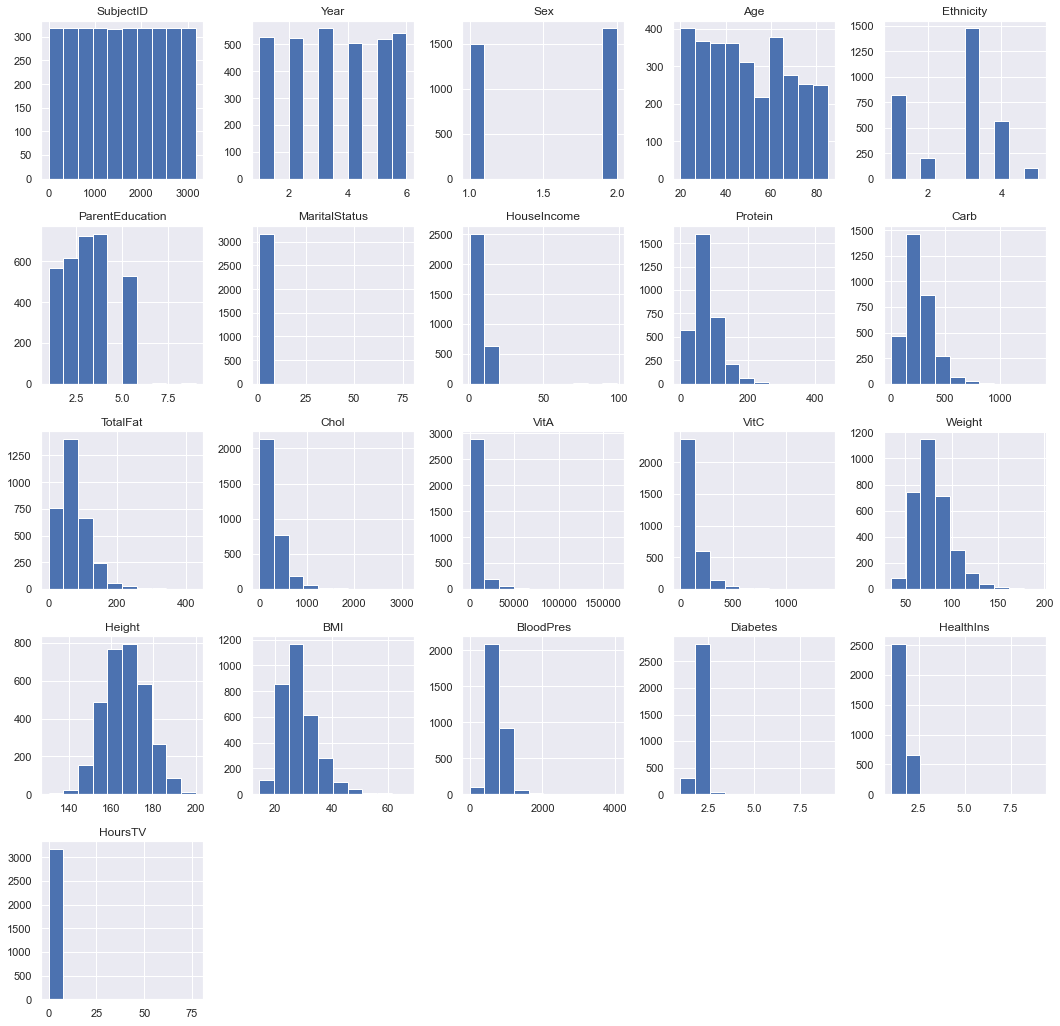

In [19]:
# Histograms are often used to understand and visualize frequency distribution
data.hist()
plt.plot()

There are a lot of different shapes to these histograms. Some can be explained easily: Subject ID is linear, and Height is more or less a Normal Distribution. 

If you didn't know, **Normal Distribution** is capitalized because it refers to a specific shape: the so-called **bell curve**. It is used to describe probability distributions with a fixed variance about the mean.
<br></br>


Another thing you might notice is that some plots, such as `MaritalStatus` and `HoursTV`, seem to only have one or two bars, and they are clustered at 0. This suggests the presence of an **outlier** in these variables: a few values that are far outside the rest of the distribution. In the case of HoursTV, what do you notice about the axis?
<br></br>


If we return to the table above, we see that 75% of the values for `HoursTV` are 4 or less, yet the maximum is 77. We might surmise that `HoursTV` should never exceed 24, and that the outlier of 77 is actually an invalid datum.
> Findings like this can help us **"clean"** our data by removing invalid entries, which will improve our modeling.
<br></br>


For the `Age` variable, the histogram is skewed to the right, such that the median is greater than the mean. Because `Age` doesn't fit a Normal Distribution, we need to **normalize** the data before inputting it to a machine learning algorithm. Once the data is Normal (like the Height variable is already), the next step is to **standardize** the data, so different variables are comparable. We will talk more about these steps later on.

## Bivariate Analysis

**Bivariate analysis** is conducted to determine the **relationship between two variables**. It aims to investigate how one variable impacts another. Examples include Scatterplots, Stacked Bar Charts, and Bivariate Line Charts. It is also very important for identifying which features to use. 

<AxesSubplot:>

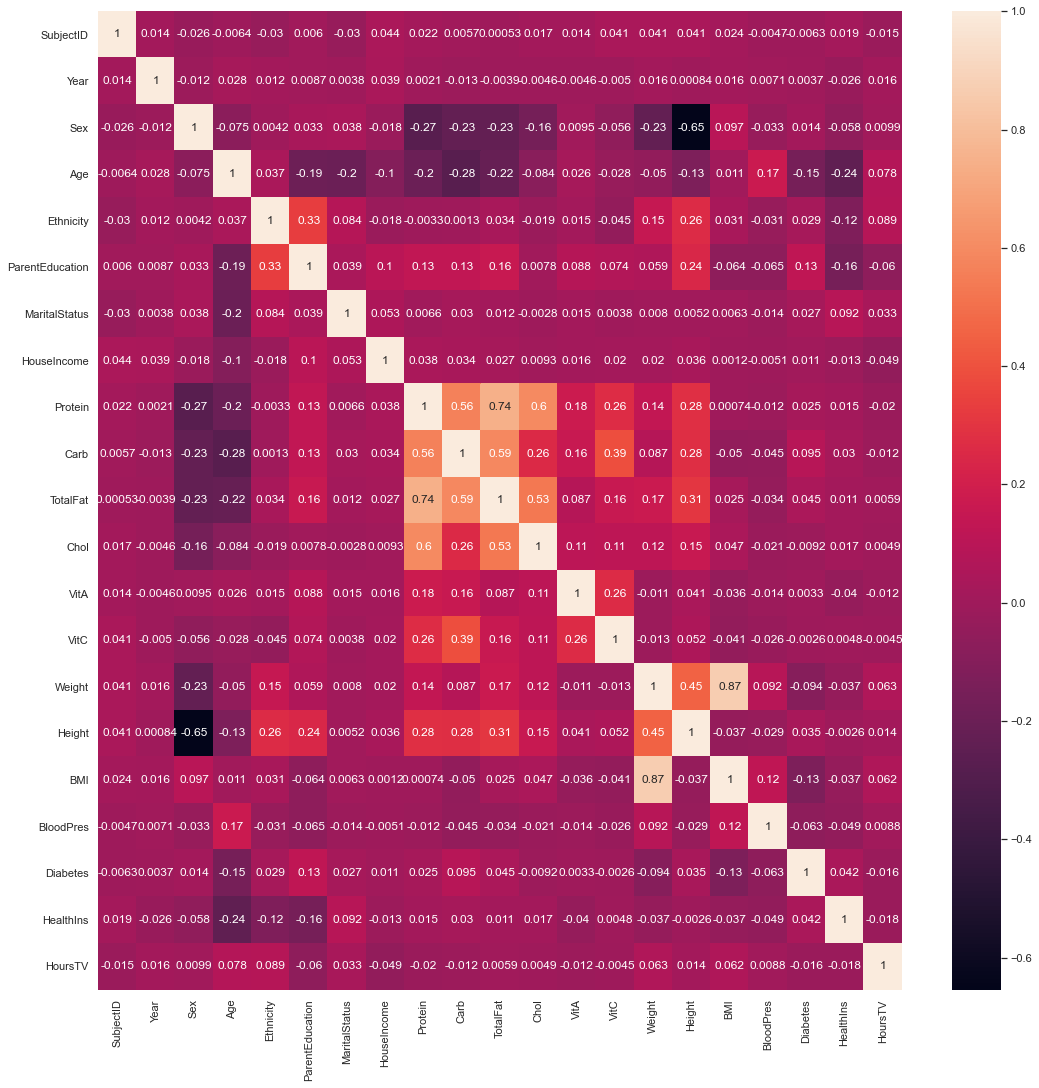

In [20]:
sns.heatmap(data.corr(), annot = True)

Looking at the heatmap again, pick the variables that provide some of the highest correlation values. (For now we'll analyze linear relationships, although if you're interested here is an intro to curvilinear relationships:
https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/)
<br></br>

You can see `Protein` and `TotalFat` has a correlation of `0.74`.
<br></br>

**REMEMBER**: Correlation ***DOES NOT*** equal Causation!

Text(0.5, 1.0, 'Scatter plot of Protein vs. TotalFat')

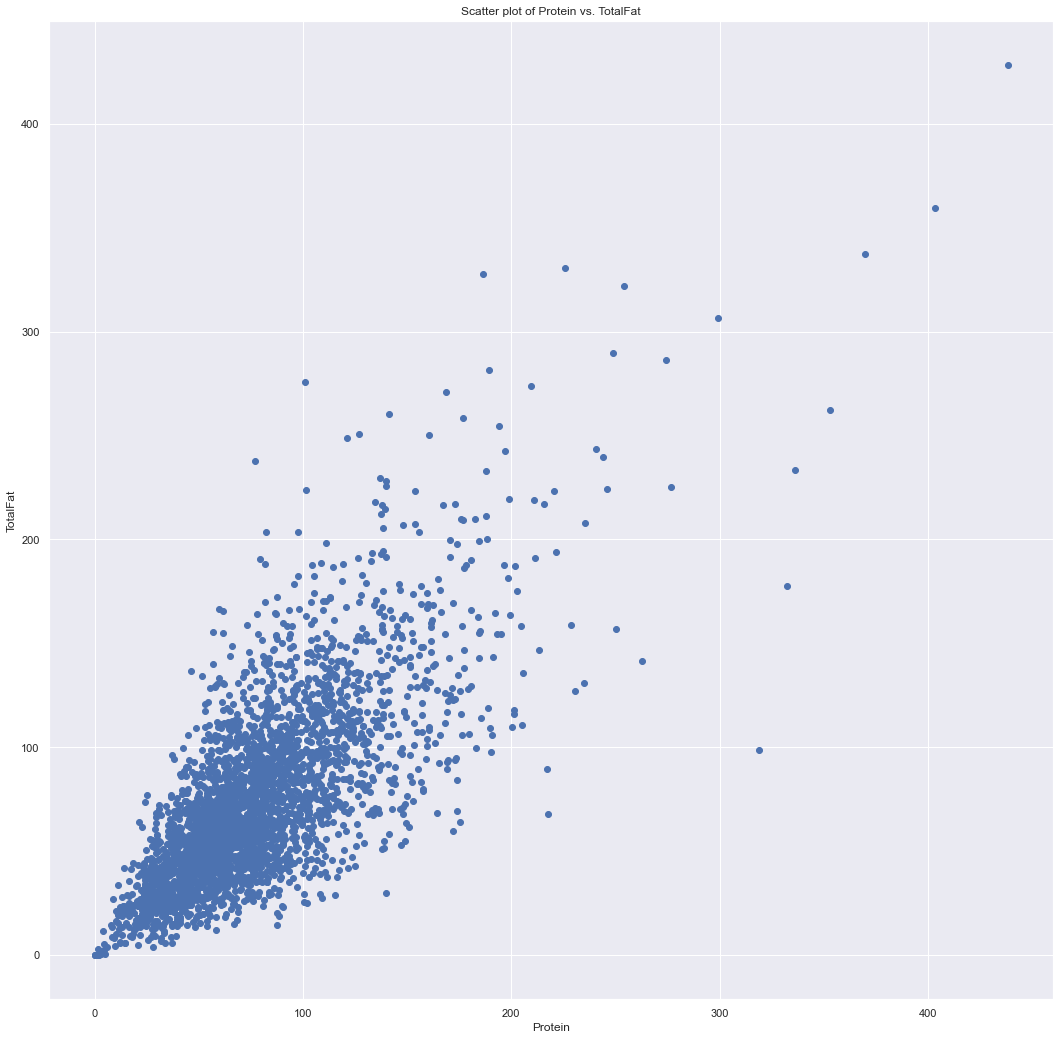

In [21]:
x = data["Protein"]
y = data["TotalFat"]
plt.scatter(x, y)
plt.xlabel("Protein")
plt.ylabel("TotalFat")
plt.title("Scatter plot of Protein vs. TotalFat")

From the graph there is an apparent strong positive association between `"TotalFat"` and `"Protein"`. However, there seems to be an overplotting of points. Fortunately, we have a solution: create a hex plot!

By Hex plotting, points in space are aggregated into hexagons, and the shading of the Hex plot are represented by the values.

For reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hexbin.html 

<AxesSubplot:xlabel='Protein', ylabel='TotalFat'>

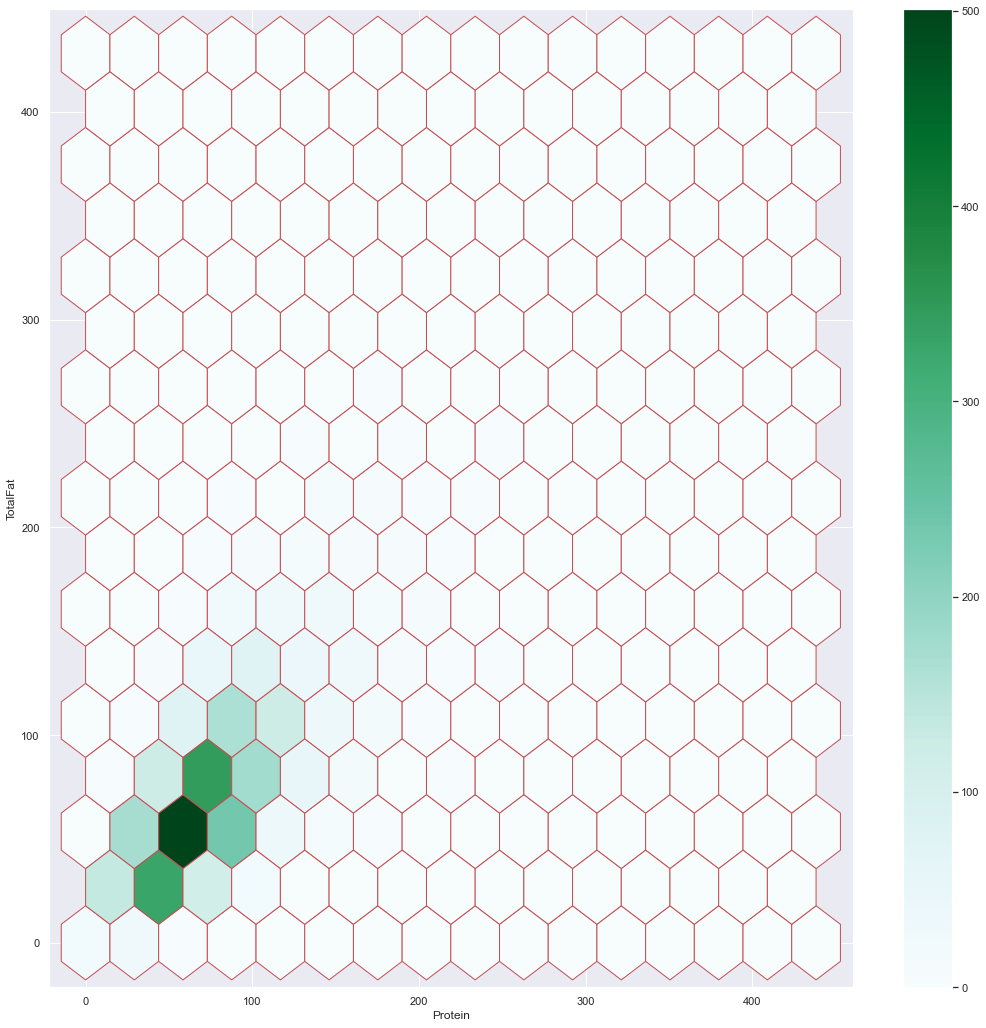

In [22]:
data.plot.hexbin(x = "Protein", y = "TotalFat", gridsize = 15, ec = "r", sharex=False)

That's better. Now we can see the data surrounding 50 grams of TotalFat and around 60 grams of Protein. If the Data was more spread out, that would improve the effectiveness of the ML output.

That's all for now! Here is more info if you want an intro to Multivariate Analysis: https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f3d2e979-42f4-4fa4-a66a-116a1c2662d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>